<div class="alert alert-block alert-info">
<span style="font-size:xx-large;"><center>Interpolation</center></span>
</div>
Interpolation is basically a mathematical operation which consists in building a curve according to a range of data.
In the daily life, this process is the base of Machine Learning.  
For example with a smart car, it aims to be driven by itself, without the help of the human.
But, to realize this task, it needs an important amount of data like "How humans drive" to learn from us and get the best behavior while machine is driving. 

Here we will imagine that we got some raw data from the following equation:
$$ f(x) = e^{(x^2)} - ax^2 $$
So we can plot it on $[-1,1]$

<IPython.core.display.Javascript object>


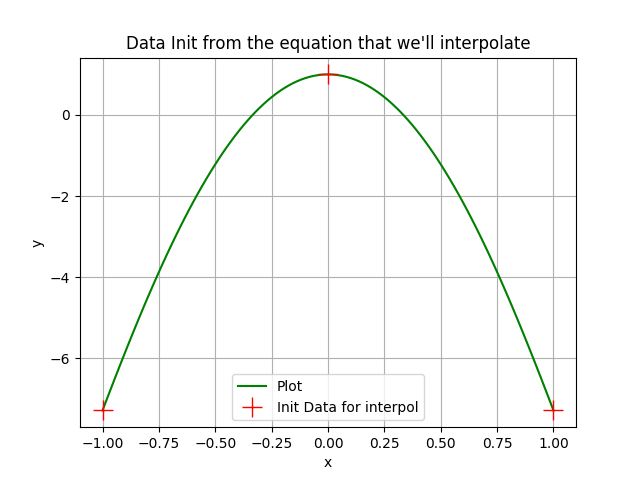

In [29]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import math

xmin, xmax = -1.0, 1.0
x_interpol = np.linspace(xmin,xmax,3)
Npts = 110
x = np.linspace(xmin,xmax,Npts)
alpha = 10.
def function(x,a):
    y = np.exp(x**2.) - a*x**2.
    return y
y = function(x,alpha)
y_interpol = function(x_interpol,alpha)

plt.figure("1st fig")
plt.plot(x,y,'-g',label='Plot')
plt.plot(x_interpol,y_interpol,'+r',markersize=15,label='Init Data for interpol')
plt.xlabel("x")
plt.ylabel("y")
plt.title('Data Init from the equation that we\'ll interpolate')
plt.grid(True)
plt.legend(loc='best')
plt.show()

# Invert of Matrix

A first method to interpolate this function is to use a matrix to solve a linear system of equations.  
We will work in this case with a second order polynomia $ax^{2} + bx + c$, so we will need to determine three equations for three different coefficients (a,b,c).  

Here we will look for the coefficients of the values (-1, 0, 1):

$$
\begin{align}
x_{-1} &=& -1 &=>& f_{-1} = ?\\
x_{0} &=& 0 &=>& f_{0} = ?\\
x_{1} &=& 1 &=>& f_{1} = ?\\
\end{align}
$$

And find $a,b,c$ by the use of an inverted matrix.  

Then write your polynom in python and draw a plot of both curves

<IPython.core.display.Javascript object>


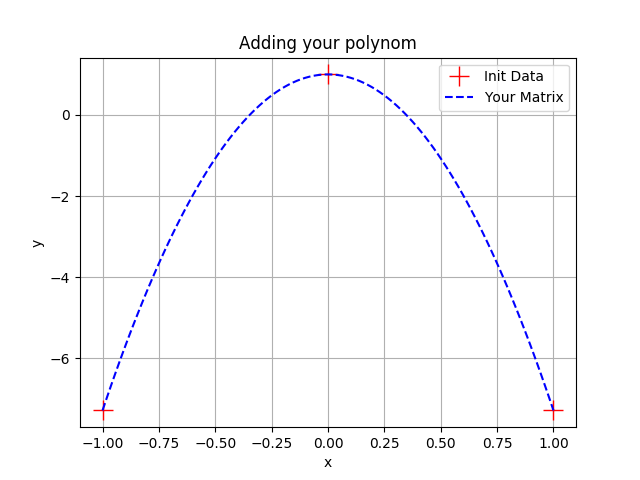

In [28]:
a = -8.2817
b = 0.
c = 1.
def Polynom(x,a,b,c):
    y = a*x**2. + b*x + c
    return y
y_pol = Polynom(x,a,b,c)

plt.figure("2nd fig")
plt.plot(x_interpol,y_interpol,'+r',markersize=15,label='Init Data')
plt.plot(x,y_pol,'--b',label='Your Matrix')
plt.grid(True)
plt.xlabel("x")
plt.ylabel("y")
plt.title('Adding your polynom')
plt.legend(loc='best')
plt.show()

Now that you lost your mind on this inversion of matrix, you can also use python to solve it step by step, giving him the [3,3] matrix that you got from the prior part.

In [3]:
Y = np.array(([function(-1.,10.)],[function(0.,10.)],[function(1.,10.)]))
Matrice = np.array(([1,-1,1],[0,0,1],[1,1,1]))


You can invert your matrix using np.linalg.inv(Matrice)

In [4]:
Mat_inv = np.linalg.inv(Matrice)

And then obtain the result of your system using np.dot

In [5]:
Results = np.dot(Mat_inv,Y) 

The result of np.dot will contain the coefficient of your polynom that you can send to your prior Polynom declared function and then plot it.

<IPython.core.display.Javascript object>


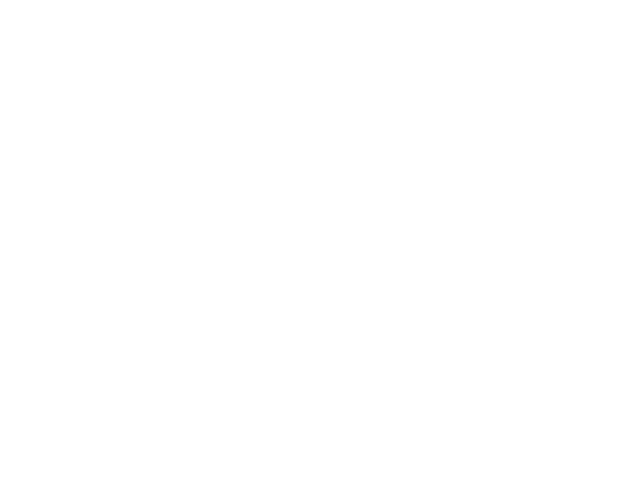

In [6]:
a_Mat, b_Mat, c_Mat = Results[0],Results[1],Results[2]
y_pol_Mat = Polynom(x,a_Mat, b_Mat, c_Mat)

plt.figure()
plt.plot(x,y,'+r',markersize=15,label='Init data')
plt.plot(x,y_pol_Mat,'-g^',label='Python matrix')
plt.plot(x,y_pol,'--b',label='Your Matrix')
plt.xlabel("x")
plt.ylabel("y")
plt.title('Final Graph')
plt.grid(True)
plt.legend(loc='best')
plt.show()

# SCIPY Package : Lagrange Interpolation

As we saw in the prior TP, Python go even further with already written interpolation algorithms. Here we will use the lagrange interpolation from scipy. I advice you to call this module with the following line.

In [7]:
from scipy import interpolate

Then, from this package if you want to use the lagrange interpolation you just have to write:

example = interpolate.lagrange()

Check the http://docs.scipy.org/doc/scipy/reference/interpolate.html website to learn how to use the lagrange interpolation.


But first, we will declare the following equation in a new function:  
$f(x) = sin(2.x.\pi)$  
And plot it on [0,2]. You can directly copy the prior program of this practice and change the equation that we used.

<IPython.core.display.Javascript object>


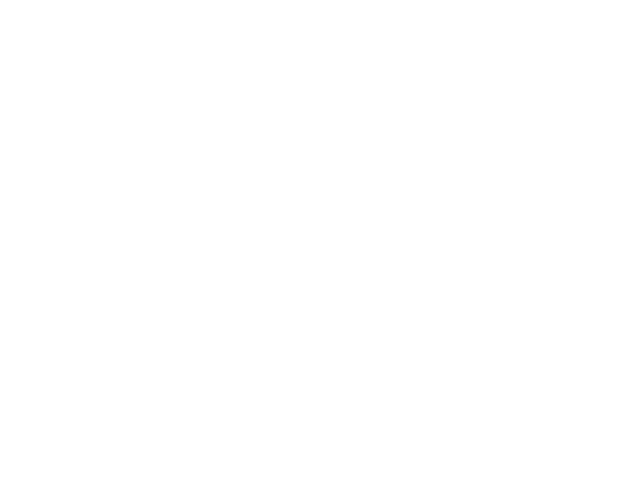

In [8]:
xmin, xmax = 0.0, 2.0
Npts = 30
x = np.linspace(xmin,xmax,Npts)

def function2(x):
    y = np.sin(2.*x*np.pi)
    return y

y_sin = function2(x)
plt.figure(4)
plt.plot(x,y_sin,"+r",markersize=15,label="Init Data")
plt.grid(True)
plt.xlabel("x")
plt.ylabel("y")
plt.title('Data Init from the equation that we\'ll interpolate')
plt.legend(loc="best")
plt.show()


On the same interval, with 10 points, declare a variable "x_lag".

In [9]:
Npts_lag = 10
x_lag = np.linspace(xmin,xmax,Npts_lag)

You can finally use the lagrange interpolation and plot the results of those 10 points that you will obtain.

<IPython.core.display.Javascript object>


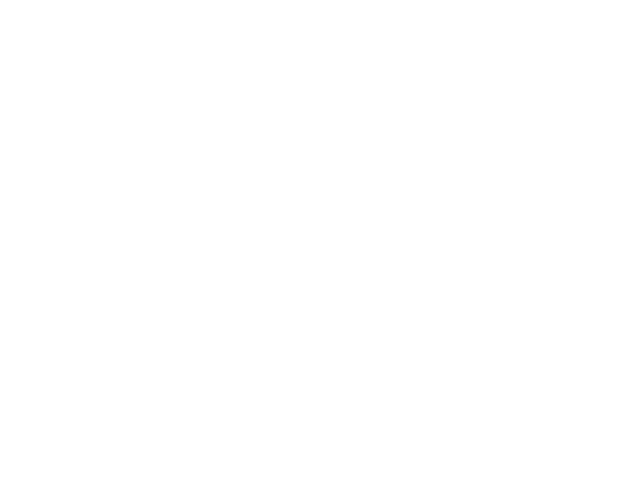

In [10]:
y_lag = function2(x_lag)
p = interpolate.lagrange(x_lag,y_lag)
plt.figure(5)
plt.plot(x,y_sin,"+r",markersize=15,label="Courbe Init")
plt.plot(x_lag,y_lag,"+b",markersize=15,label="Interpolation Lagrangienne")
plt.xlabel("x")
plt.ylabel("y")
plt.title('Data Init + Interpolation Lag')
plt.grid(True)
plt.legend(loc="lower left")
plt.show()


Now that we interpolated this function with the lagrange package, we can determine the coefficients of this polynom of order 9, according to the number of points that we declared in "x_lag" with a simple declaration of the coeficients:

In [11]:
coef = p.c
print(coef)

[   19.9998631   -179.99876788   656.22762725 -1233.61639043
  1259.47249677  -681.15258025   193.06934056   -43.58139474
     9.57980562     0.        ]


You can verify that we have the good amount of coeficients with this print statement.

Then, to define you polynom, you will write a function giving you for each x, the y result of the polynom.  
We saw that coef contains all of the coefficient of the polynom form, and the function pow can be used in a loop to select the power up of the variable.

In [12]:
def Pol(x):
    n = len(coef)
    Pol = coef[n-1]
    for i in range(0,n-1):
        Pol = Pol + coef[i]*pow(x,n-1-i)
        print("i=",i)
    return Pol

Plot all the results on the same graph. If you get the same curve and all your cells are exectued, consider that this second part of the practice is done.

i= 0
i= 1
i= 2
i= 3
i= 4
i= 5
i= 6
i= 7
i= 8


<IPython.core.display.Javascript object>


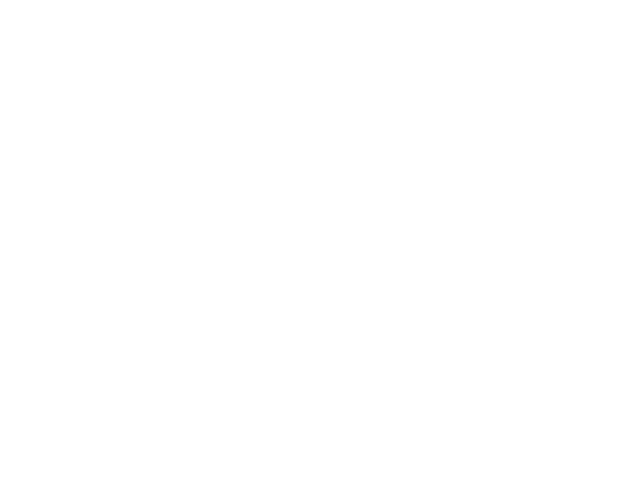

In [13]:
y_pol = Pol(x)
plt.figure()
plt.plot(x,y_pol,"-k",markersize=15,label="Polynom")
plt.plot(x,y_sin,"+r",markersize=15,label="Init Data")
plt.plot(x_lag,y_lag,"+b",label="Interpolation Lagrangienne")
plt.xlabel("x")
plt.ylabel("y")
plt.title('Polynom from the prior initerpolation')
plt.grid(True)
plt.legend(loc="lower left")
plt.show()


You can also rerun this part of the program with another number of points for your Lagrange interpolation, which will raise or decrease the order of your polynomial and check out the result on your graph.

# Runge Instability  
  
Normally you saw in the prior part that a too high polynomial is creating some trouble, this has been studied by the mathematician Runge and we will explore its function in the part below.  

In the third part of this practice, we will work on the runge function which is define by \\( f(x) = \frac{1}{1 + 25 x^{2}} \\)

So first, define this function and plot it.

<IPython.core.display.Javascript object>


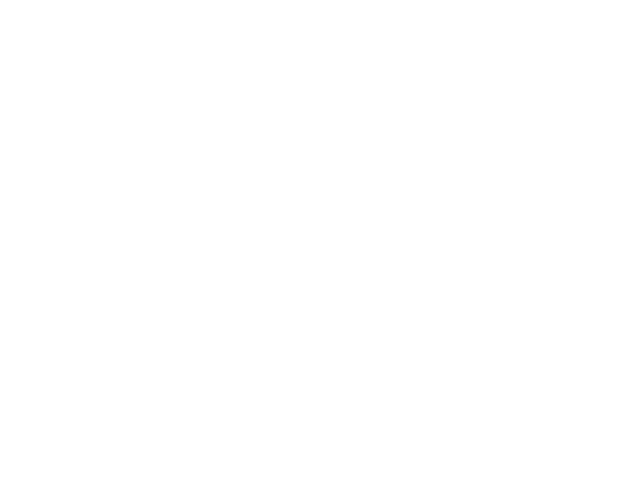

In [14]:
def runge_function(x):
    y = 1/(1+25.*x**2.)
    return y

xmin = -1.0
xmax = 1.0

fig, ax = plt.subplots()

t = np.arange(xmin, xmax, 0.01)


ax.plot(t, runge_function(t),'r-', label="Runge")
plt.xlabel("x")
plt.ylabel("y")
plt.title('Runge Function')
plt.grid(True)
plt.legend(loc="upper left")

Then we will try to interpolate this function with the help of a polynom, so first, declare a function which will give us the result of the linear system with the help of a matrix.

In [15]:
def coefs(x,y):
    mat = np.zeros((len(x),len(x)))
    for p in range(len(x)):
        mat[p, :] = [x[p] ** i for i in range(len(x))]

    return np.linalg.solve(mat, y)

Then, with the result of the prior define function, we can define the polynom on an other function.

In [16]:
def poly(x, coefs):
    return sum(coef*x**i for i, coef in enumerate(coefs))


With the use of those functions, you can interpolate the runge equation to obtain a polynomial form.

The number of points that you will set on your function in the graph, represented by the black marker, will directly provide you the order of your polynomial form. Try a high and low number and compare them, for example 9 and 100.

<IPython.core.display.Javascript object>


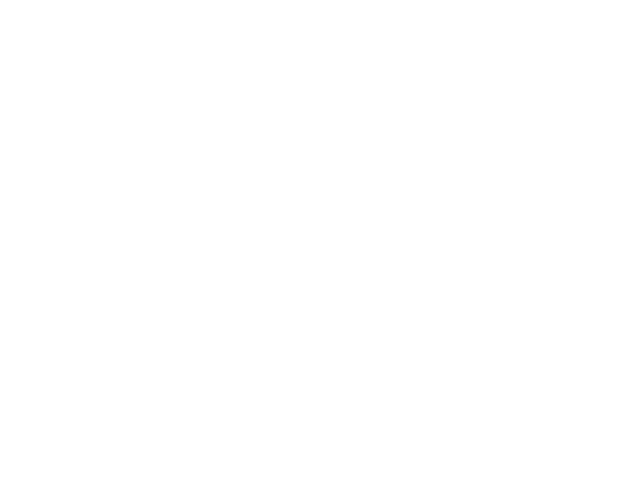

In [17]:
npoints=9
x = np.linspace(-1.,1.,npoints)

y = runge_function(x)
coef_poly = coefs(x,y)

fig, bx = plt.subplots()

bx.plot(t, runge_function(t),'r-', label="Runge")
bx.plot(t, poly(t, coef_poly),'k-',label="Polynomial form")
bx.plot(x, poly(x, coef_poly),'ko',label="Points of Interpol")
bx.set_xlim(xmin,xmax)
bx.set_ylim(-0.1,1.2)
plt.xlabel("x")
plt.ylabel("y")
plt.title('The Runge Interpolation')
#ax.fill_between(t, 0, runge_function(t))
plt.grid()
plt.legend(loc="upper left")
plt.show()

You can see on the graph the highs fluctuations of values on both extremities of the domain. This is called Runge's phenomenon in the mathematical field of numerical analysis.
Runge's phenomenon is a problem of oscillation at the edges of an interval that occurs when using polynomial interpolation with polynomials of high degree over a set of equispaced interpolation points. It was discovered by Carl David Tolmé Runge (1901).The discovery was important because it shows that going to higher degrees does not always improve accuracy.

An interesting behavior to select how to set our points on the runge function that we try to interpolate is the arctan function, $f(x) = arctan(ax)$.  
After plotting this function, you can observe that with respect to the positioning of the markers that at the start/end of the function, they are more abundant.  
Using this fuction to set our lapse between the points to interpolate our runge function will help to correct the instabilities that we observed.

<IPython.core.display.Javascript object>


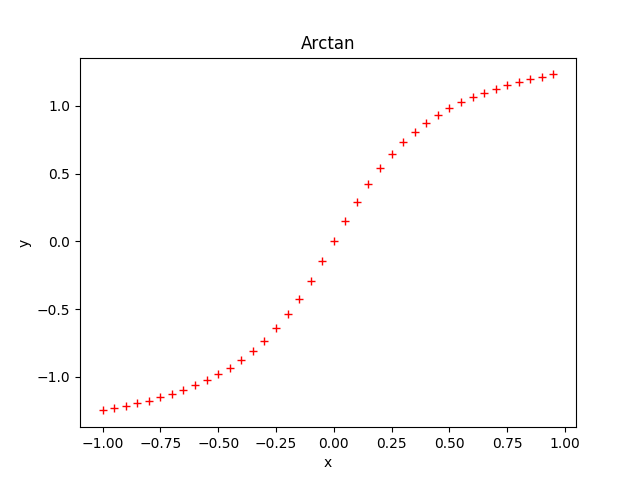

In [30]:
def arctan(x):
    y = np.arctan(3*x)
    return y

fig, cx = plt.subplots()

t = np.arange(xmin, xmax, 0.05) 

cx.plot(t, arctan(t),'r+')
plt.xlabel("x")
plt.ylabel("y")
plt.title('Arctan')
plt.show()

You can now interpolate the runge function with the $arctan(ax)$ function to determine a polynomial form which wont oscillate on the extremities of the domain. (You can change the a coefficient to adapt the trend of your polynomial form)  

<IPython.core.display.Javascript object>


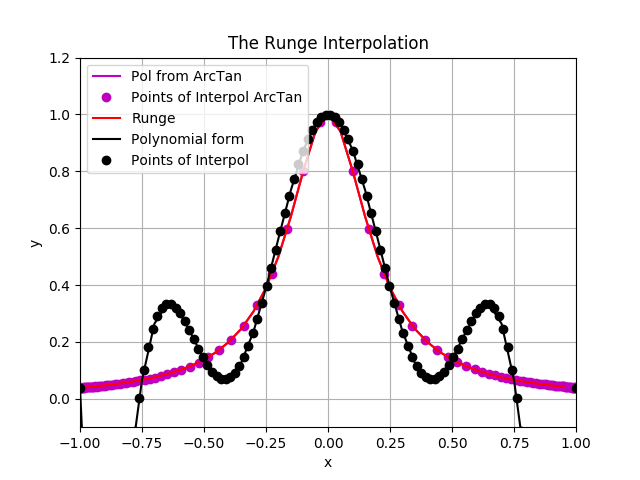

In [37]:
x2 = np.arctan(5*x)
x2 /= np.max(x2)
y2 = runge_function(x2)
coef_poly2 = coefs(x2,y2)

fig, dx = plt.subplots()

dx.plot(t, poly(t, coef_poly2),'m-',label="Pol from ArcTan")
dx.plot(x2, poly(x2, coef_poly2),'mo',label="Points of Interpol ArcTan")
dx.plot(t, runge_function(t),'r-', label="Runge")
dx.plot(t, poly(t, coef_poly),'k-',label="Polynomial form")
dx.plot(x, poly(x, coef_poly),'ko',label="Points of Interpol")
dx.set_xlim(xmin,xmax)
dx.set_ylim(-0.1,1.2)
#dx.fill_between(t, 0, runge_function(t))


dx.set_xlim(xmin,xmax)
dx.set_ylim(-0.1,1.2)
plt.xlabel("x")
plt.ylabel("y")
plt.title('The Runge Interpolation')
dx.grid()
plt.legend(loc="upper left")
plt.show()

# Spline Interpolation

We saw that define some points along the function that we want to interpolate with respect to the trend of this one, as done with the $arctan(ax)$ function to set the positioning is not the easiest way to get a satisfactory result.  
Another way to do this could be to set various Polynomial form along the function that we would have previously split according to its trend to get a better approximation.  
This method is used in Fluid Mechanics to determine a Drag Coefficient with respect to the Reynolds of the situation, for example, various equation are written to get an accurate result for each Reynolds that we have. You can see an example of the figure below.

<table>
    <tr>
        <td> <img src="StokesLaw.png" alt="Flowchart" style="height: 420px"/> </td>
        <td> <img src="Equation.png" alt="Flowchart" style="height: 420px;"/> </td>
    </tr>
</table>

So the black curve is computed from the equation that you see on other part to follow as perfectly as possible the data from experiments that have been obtained.  
This is called in maths a Spline.

So let's go back on the function $sin(2 \pi x)$ and interpolate it with the Spline method.  
You will find information on the following link:  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.UnivariateSpline.html

In [20]:
from scipy.interpolate import UnivariateSpline as USP

<IPython.core.display.Javascript object>


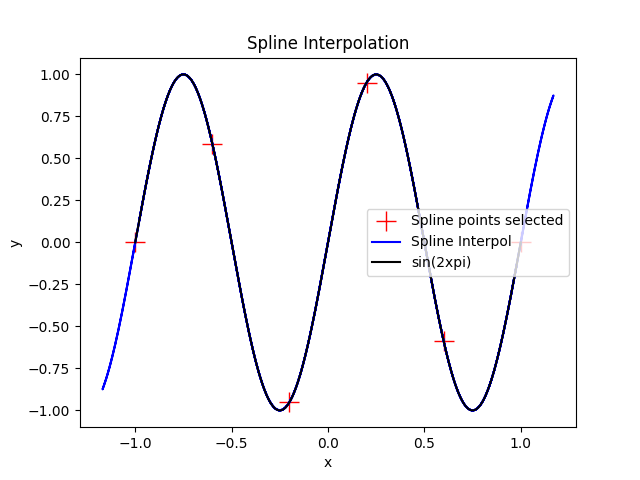

In [62]:
#Spline Data
npoints = 6
x_spline = np.linspace(-1.,1.,npoints)
y_spline = function2(x_spline)
spl = USP(x_spline, y_spline,s='0',k='3')
#Use Spline
x_init = np.linspace(-1.,1.,1000)
x_spl = spl(x_init) 
y_spl = function2(x_spl)
#Init Sin Function
x_sin = np.linspace(-1.,1.,1000)
y_sin = function2(x_sin)

plt.figure("Spline 1st fig")
plt.plot(x_spline,y_spline,'+r',markersize=15,label='Spline points selected')
plt.plot(x_spl,y_spl,'-b',label='Spline Interpol')
plt.plot(x_sin,y_sin,'-k',label='sin(2xpi)')
plt.xlabel("x")
plt.ylabel("y")
plt.title('Spline Interpolation')
plt.legend(loc='best')
plt.show()

A method to check the accuracy of the interpolation would have been to use the integration of each function, you can get a visualization of the area under your curve with the statement:  
$fill between()$  

There an example:

In [ ]:
fig, ex = plt.subplots()
ex.plot(t, runge_function(t),'r-', label="Runge")
ex.fill_between(t, 0, runge_function(t))
plt.xlabel("x")
plt.ylabel("y")
plt.title('Runge Function')
plt.grid(True)
plt.legend(loc="upper left")

<div class="alert alert-block alert-danger">
<span style="font-size:xx-large;">
    <center>
        **Do not forget**
    </center>
</span>
</div>

Once all cells have been **filled** and **executed**, save this document as a pdf file (by printing it)  
Check that everything is present on the produced pdf  
Send **the pdf AND the notebook** to me via Universitice  
This will be used to evaluate you.

<div class="alert alert-block alert-info">
<span style="font-size:xx-large;"><center>That's it for today !</center></span>
</div>